# Libraries needed

In [ ]:
# Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dataset & Preprocessing

In [64]:
# Load the dataset
data = pd.read_csv('placementdata.csv')

# Display the first few rows of the dataset
data.head()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [65]:
# Drop rows with missing values
data.dropna(inplace=True)

In [66]:
# Count the number of students placed and not placed
placement_counts = data['PlacementStatus'].value_counts()
print("Placement Status Counts:")
print(placement_counts)

Placement Status Counts:
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64


In [67]:
# Data Preprocessing

# Drop the StudentID column
data.drop(columns=['StudentID'], inplace=True)

# Define Categorical, Numerical Features & Target
categorical_columns = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
numerical_columns = [col for col in data.columns if col not in categorical_columns]
target = 'PlacementStatus'

# Encode Categorical Features (Excluding Target)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale Only Numerical Features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("Preprocessed Data:")
print(data.head())

Preprocessed Data:
       CGPA  Internships  Projects  Workshops/Certifications  \
0 -0.309343    -0.073889 -1.182822                 -0.014598   
1  1.877818    -1.575689  1.121526                  1.091319   
2 -0.621794    -0.073889 -0.030648                  1.091319   
3 -0.309343    -0.073889 -1.182822                  1.091319   
4  0.940464    -0.073889 -0.030648                  1.091319   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0          -1.770910          0.184742                          0   
1           1.292970         -0.787072                          1   
2           0.312528          1.156555                          1   
3           0.680194          0.184742                          1   
4           0.802749          0.427695                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0  -0.782306   0.504368                0  
1                  1   0.847618   0.840726               

In [68]:
# Split the data into training and testing sets
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

## Training

In [71]:
# Apply Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [72]:
# Predict on the training set
y_train_pred = model.predict(X_train)

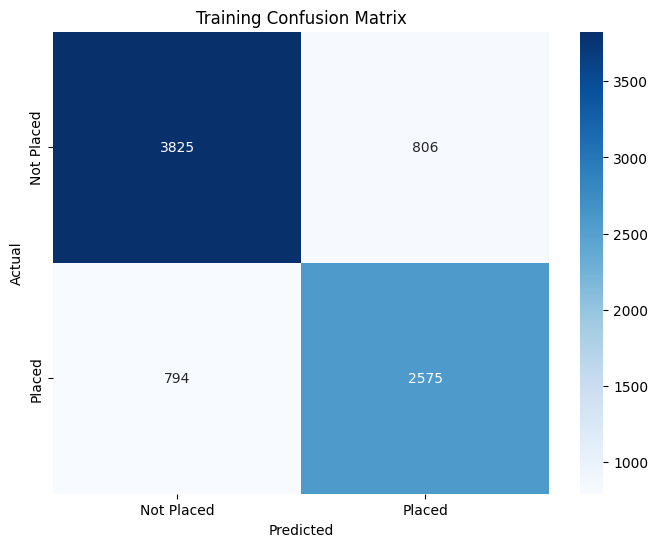

In [75]:
# Evaluate Training Performance
train_cm = confusion_matrix(y_train, y_train_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Training Confusion Matrix')
plt.show()

In [76]:
# Compute Training Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Print Training Metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")

Training Accuracy: 0.8000
Training Precision: 0.7616
Training Recall: 0.7643
Training F1-Score: 0.7630


## Testing

In [77]:
# Predict on the test set
y_pred = model.predict(X_test)

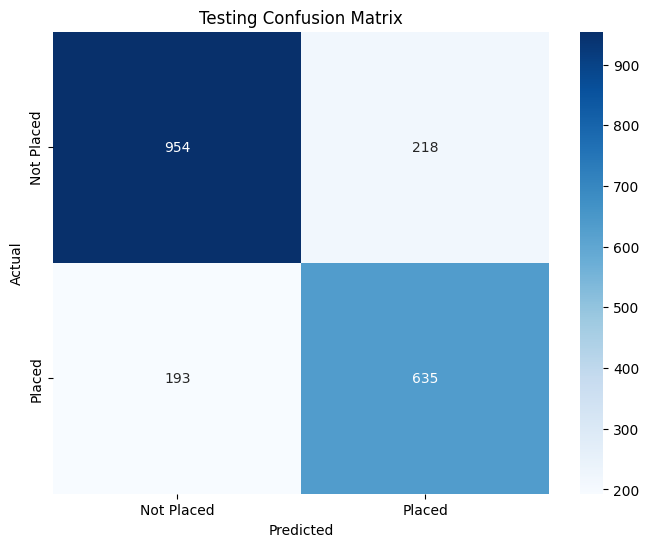

In [82]:
# Evaluate Testing Performance
test_cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing Confusion Matrix')
plt.show()

In [83]:
# Compute Training Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7945
Precision: 0.7444
Recall: 0.7669
F1-Score: 0.7555
